## Experimenting with ARC

See [arc rydberg calculator notebook](https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/Rydberg_atoms_a_primer_notebook.html#Rydberg-atom-interactions)

In [1]:
import arc

atom = arc.Rubidium()
# n, l, j, m
# state = (n, 0, 1/2, -1/2)
rvdw = calc.getLeRoyRadius()
s1 = (atom.groundStateN, 0, 1/2, -1/2)
s2 = (60, 1, 1+1/2, 1/2)


# w: 1/e^2 beam radius
# P: laser power
# atom.getRabiFrequency(n1,l1,j1,mj1,n2,l2,j2 ,mj2,P,w)
P=1
w=1
atom.getRabiFrequency(*s1,*s2,P,w)

2076.626189798191

In [25]:
atom.groundStateN

5

In [9]:
import arc

import numpy as np
a = arc.Rubidium()

# obtained from looking at the graphs of C6 on Rubidium 
# Although, the dimensional analysis thinks its 2pi/1000 instead  
ratio_ARC_TO_PASQAL = 2*np.pi * 10**3 


def getC3fromstates(atom1, state1_s, state1_f, q1, atom2, state2_s, state2_f,  q2):
    '''
    Estimate the short range coeficient C_3.
    atom1,2: atoms that are interacting
    state1,2_s: states of corresponding atoms where the interaction is starting
    state1,2_f: states of corresponding atoms where the interaction ends
    q: specifies transition that the driving field couples to, +1, 0 or -1 corresponding to driving
    sigma_+, pi, sigma_- transitions respectively.   
    Returns C_3 in units of GHz (mu m)^3  
    '''
    # coupling od 59 D_{3/2} m_j = 3/2 -> 51 P_{1/2} m_j = 1/2
    dpDME = atom1.getDipoleMatrixElement(*state1_s, *state1_f, q1)
    # coupling od 59 D_{3/2} m_j = 3/2 -> 57 F_{5/2} m_j = 5/2
    dfDME = atom2.getDipoleMatrixElement(*state2_s, *state2_f, q2)
    c3  = 1/(4.0*np.pi*arc.epsilon_0)*dpDME*dfDME*arc.C_e**2*\
                    (arc.physical_constants["Bohr radius"][0])**2
    return (abs(c3)/arc.C_h*1.e9)
    # print("C_3 = %.3f GHz (mu m)^3 " % (abs(c3)/arc.C_h*1.e9  ))


def getC6fromstates(atom1, state1, atom2, state2, theta=np.pi/2):
    '''
    Estimate the long range coeficient C_6.
    atom1,2: atoms that are interacting
    state1,2: states of corresponding atoms that are interacting 
    Returns C_6 in units of GHz (mu m)^6
    '''
    # parameters: atom, n1, l1, j1 , n2, l2 , j2 , mj1, mj2 
    calc = arc.PairStateInteractions(atom1, *state1[:3], *state2[:3], state1[3], state2[3], atom2=atom2) 
    # parameters: theta, phi, deltan, deltaE 
    c6 = calc.getC6perturbatively(theta, 0, 5, 25.e9) 
    # print("C_6 = %.0f GHz (mu m)^6" % c6)
    return c6


In [3]:
c6_pasqal = {
"50": 96120.72,"51": 122241.6,"52": 154693.02,"53": 194740.36,"54": 243973.91,"55": 304495.01,
"56": 378305.98,"57": 468027.05,"58": 576714.85,"59": 707911.38,"60": 865723.02,"61": 1054903.11,
"62": 1281042.11,"63": 1550531.15,"64": 1870621.31,"65": 2249728.57,"66": 2697498.69,"67": 3224987.51,
"68": 3844734.37,"69": 4571053.32,"70": 5420158.53,"71": 6410399.4,"72": 7562637.31,"73": 8900342.14,
"74": 10449989.62,"75": 12241414.53,"76": 14308028.03,"77": 16687329.94,"78": 19421333.62,"79": 22557029.94,
"80": 26146720.74,"81": 30248886.65,"82": 34928448.69,"83": 40257623.67,"84": 46316557.88,"85": 53194043.52,
"86": 60988354.64,"87": 69808179.15,"88": 79773468.88,"89": 91016513.07,"90": 103677784.57,
"91": 117933293.96,"92": 133943541.9,"93": 151907135.94,"94": 172036137.34,"95": 194562889.89,"96": 219741590.56,
"97": 247850178.91,"98": 279192193.77,"99": 314098829.39,"100": 352931119.11
}

In [49]:
atom = arc.Rubidium()

c6_test = {}

for n in range(50,101):
    # n, l, j, m
    state = (n, 0, 1/2, -1/2)
    c6_test[str(n)] = -getC6fromstates(atom, state, atom, state)


In [51]:
1/(2*np.pi)

0.15915494309189535

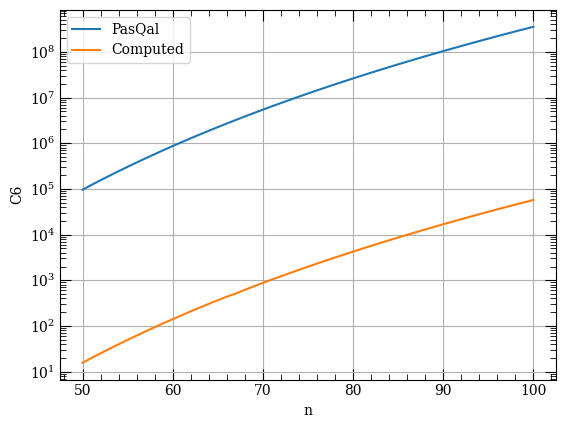

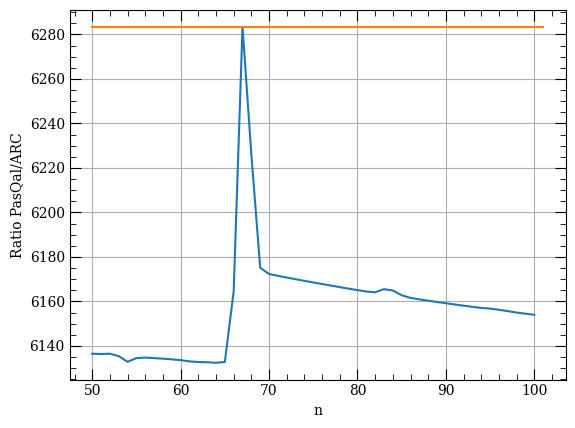

In [53]:
import matplotlib.pyplot as plt

c6_pq_arr = np.array([*c6_pasqal.values()])
c6_t_arr = np.array([*c6_test.values()]) 

plt.plot(range(50,101), c6_pq_arr, label='PasQal')
plt.plot(range(50,101), c6_t_arr, label='Computed')

plt.ylabel('C6')
plt.xlabel("n")
plt.yscale('log')
plt.grid(1)
plt.legend()
plt.show()

plt.plot(range(50,101), c6_pq_arr/c6_t_arr)
plt.plot([50,101], [2*np.pi*10**3]*2)
plt.ylabel('Ratio PasQal/ARC')
plt.xlabel("n")
plt.grid(1)
plt.show()

In [40]:

print( f"Ratio 1 C_6_pasqal/C_6_ARC: {(c6_pasqal['50']/c6_test['50'])}" )
print( f"Ratio 2 C_6_pasqal/C_6_ARC: {(c6_pasqal['100']/c6_test['100'])}" )
print("C_6: Units ARC: GHz (mu m)^6")

print("C_3: Units PasQal: mu m^3 / (mu s)")
print("C_6: Units PasQal: C_6/hbar")


Ratio 1 C_6_pasqal/C_6_ARC: 6136.521288294777
Ratio 2 C_6_pasqal/C_6_ARC: 6154.007427861762
C_6: Units ARC: GHz (mu m)^6
C_3: Units PasQal: mu m^3 / (mu s)
C_6: Units PasQal: C_6/hbar


In [28]:
arc.C_h

6.62607015e-34

In [50]:
2*np.pi

6.283185307179586